### Name: Soham Vaidya
### UID: 2018130058
### Roll No. 63
### BE COMPS
### B Batch



## EXPERIMENT 3
## Implementing LDA and Naive Bayes Classifier using Spam SMS Collection Dataset
Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import scipy.stats as stt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Data/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (5572, 2)


In [5]:
df.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


There are two unique target labels - ham and spam. And among both of them 'ham' is the more frequent one. Also there are some repeated messages, meaning not all are unique.

## Exploratory Data Analysis


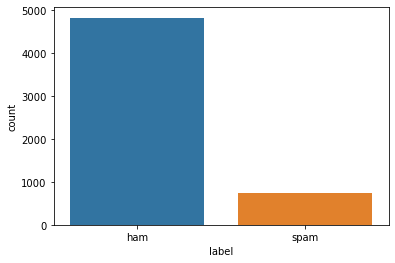

In [6]:
sns.countplot(data=df, x='label')

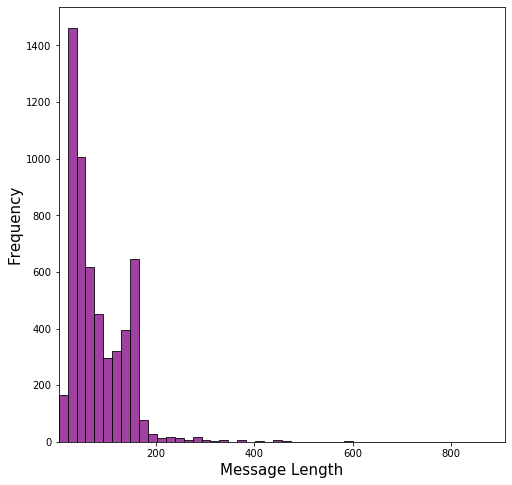

In [7]:
plt.figure(figsize=(8,8))
sns.histplot(df['message'].apply(len), bins=50, color='purple')
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Message Length", fontsize = 15)
plt.margins(x = 0)

In [8]:
df['message'].apply(len).describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message, dtype: float64

In [9]:
df[df['message'].apply(len) == 910].iloc[0]['message']

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [10]:
# Adding a new feature called length which has the length of the message
df['length'] = df['message'].apply(len)

In [11]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


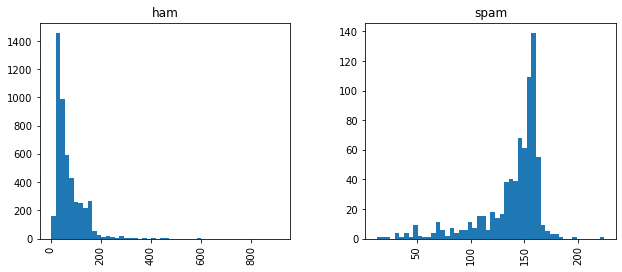

In [12]:
df.hist(column='length', by='label', bins=50,figsize=(10,4))
plt.show()

Spam messages tend to have greater length

## Data Preprocessing
- Convert everything to lower case
- Remove punctuations
- Remove all stopwords
- Apply stemming (converting to normal form of word). For example, 'driving bus' and 'drives bus' becomes drive bus

In [13]:
!pip install nltk

In [45]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
nltk.download('stopwords')
def preprocess(text):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # Removing stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # Applying stemming i.e. the process of producing morphological variants of a root/base word
    st = Stemmer()
    text = [st.stem(t) for t in text]

    return text

In [15]:
df.iloc[110]['message']

'What is the plural of the noun research?'

In [16]:
preprocess(df.iloc[110]['message'])

['plural', 'noun', 'research']

## Splitting into Training and Testing Set

In [17]:
from sklearn.model_selection import train_test_split
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Employing the Bag of Words model using Count Vectorizer to create sparse matrix


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

The preprocess function written above is in-built in CountVectorizer. Hence there is no need to implement it again.

In [19]:
training_data = count_vector.fit_transform(X_train) # Fitting the vectorizer to the training data
testing_data = count_vector.transform(X_test)  # Transforming the training data

In [20]:
count_vector.get_feature_names()[-500:-450] # This will give all the word feature names, for simplicity only 50 have been shown

['vary',
 'vasai',
 'vat',
 'vatian',
 'vava',
 'vco',
 'vday',
 've',
 'vegas',
 'vegetables',
 'veggie',
 'vehicle',
 'venaam',
 'venugopal',
 'verified',
 'version',
 'very',
 'vettam',
 'vewy',
 'via',
 'vibrant',
 'vibrate',
 'vibrator',
 'vic',
 'victoria',
 'victors',
 'video',
 'videochat',
 'videophones',
 'videos',
 'videosound',
 'videosounds',
 'view',
 'vijay',
 'vikky',
 'vill',
 'villa',
 'village',
 'vinobanagar',
 'violated',
 'violence',
 'violet',
 'vip',
 'vipclub4u',
 'virgil',
 'virgin',
 'virgins',
 'virtual',
 'visa',
 'visionsms']

In [21]:
training_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Above is the sparse matrix to be used as training data

In [22]:
len(count_vector.get_feature_names())

7612

In [23]:
training_data.toarray().shape

(4457, 7612)

The sparse matrix has 4457 rows corresponding to each message in the training data and 7612 columns corresponding to each unique word feature

In [24]:
from numpy import count_nonzero
sparsity = 1.0 - ( training_data.count_nonzero() / float(training_data.toarray().size) )
print('Sparisity of training data matrix =',sparsity)

Sparisity of training data matrix = 0.9982660845958302


## Model Selection/Training and Evaluation
### Using only Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions, pos_label='ham')))
print('Recall score: {}'.format(recall_score(y_test, predictions, pos_label='ham')))
print('F1 score: {}'.format(f1_score(y_test, predictions, pos_label='ham')))

Accuracy score: 0.9874439461883409
Precision score: 0.9874869655891554
Recall score: 0.9978925184404637
F1 score: 0.9926624737945493


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

Specificity: The metric that evaluates a model’s ability to predict true negatives of each available category.

Sensitivity/Recall: The metric that evaluates a model’s ability to predict true positives of each available category.

In [28]:
print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

Specificity: 0.9978925184404637
Sensitivity: 0.927710843373494


In [29]:
print(confusion_matrix(y_test, predictions))

[[947   2]
 [ 12 154]]


In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       949
        spam       0.99      0.93      0.96       166

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### Using only Linear Discriminant Analysis Classifier

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(training_data.toarray(),y_train)

LinearDiscriminantAnalysis()

In [32]:
pred_lda = lda.predict(testing_data.toarray())
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, pred_lda)))
print('Precision score: {}'.format(precision_score(y_test, pred_lda, pos_label='ham')))
print('Recall score: {}'.format(recall_score(y_test, pred_lda, pos_label='ham')))
print('F1 score: {}'.format(f1_score(y_test, pred_lda, pos_label='ham')))

Accuracy score: 0.873542600896861
Precision score: 0.9469026548672567
Recall score: 0.9020021074815595
F1 score: 0.923907177549919


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, pred_lda).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)


In [34]:
print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

Specificity: 0.9020021074815595
Sensitivity: 0.7108433734939759


In [35]:
print(confusion_matrix(y_test, pred_lda))

[[856  93]
 [ 48 118]]


In [36]:
print(classification_report(y_test, pred_lda))

              precision    recall  f1-score   support

         ham       0.95      0.90      0.92       949
        spam       0.56      0.71      0.63       166

    accuracy                           0.87      1115
   macro avg       0.75      0.81      0.77      1115
weighted avg       0.89      0.87      0.88      1115



The overall accuracy has dropped compared to using Naive Bayes approach alone

### Using Linear Discriminant Analysis and Naive Bayes

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [38]:
X_train_lda = lda.fit_transform(training_data.toarray(),y_train) # Fitting and transforming train data using LDA
X_test_lda = lda.transform(testing_data.toarray()) # Transforming test data using LDA

In [39]:
from sklearn.naive_bayes import GaussianNB
naive_bayes2 = GaussianNB()
naive_bayes2.fit(X_train_lda,y_train)

predictions2 = naive_bayes2.predict(X_test_lda)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions2)))
print('Precision score: {}'.format(precision_score(y_test, predictions2, pos_label='ham')))
print('Recall score: {}'.format(recall_score(y_test, predictions2, pos_label='ham')))
print('F1 score: {}'.format(f1_score(y_test, predictions2, pos_label='ham')))

Accuracy score: 0.884304932735426
Precision score: 0.9389721627408993
Recall score: 0.9241306638566913
F1 score: 0.9314922995220394


In [41]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, predictions2).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

In [42]:
print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

Specificity: 0.9241306638566913
Sensitivity: 0.6566265060240963


In [43]:
print(confusion_matrix(y_test, predictions2))

[[877  72]
 [ 57 109]]


In [44]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

         ham       0.94      0.92      0.93       949
        spam       0.60      0.66      0.63       166

    accuracy                           0.88      1115
   macro avg       0.77      0.79      0.78      1115
weighted avg       0.89      0.88      0.89      1115



The overall accuracy has dropped compared to using Naive Bayes approach alone but is better than using LDA alone

Conclusion
- I implemented Naive Bayes Classifier for Spam Detection dataset and observed an accuracy of approx. 99%. Various steps invovled in NLP were applied and I understood that without preprocessing of text samples, the classifier will not be able to accurately distinguish between spam and ham messages. An important step in NLP is converting texts into Word Vectors by using models such as Bag of Words Model etc. Without this, there will be no proper input data for the classifier to get trained on.
- Linear Discriminant Analysis was also employed for Spam Detection and an accuracy of 87% was obtained. I noticed that the overall accuracy has dropped compared to using Naive Bayes approach. However, accuracy increased when I used both Naive Bayes and LDA to 88%. Nevertheless, the accuracy was less than that of Naive Bayes indicating the power of applying Bayes' theorem with strong (naive) independence assumptions between the features.